In [1]:
import os 
os.listdir()

['.ipynb_checkpoints',
 'cumulative_2024.05.18_02.32.39.csv',
 'DAQ.ipynb',
 'koi_planet_masses_updated.csv',
 'part_A.csv',
 'part_B.csv',
 'part_E.csv',
 'part_F.csv',
 'part_G.csv']

In [2]:
# Tools to help analyse data 
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# CONSTANTS, taken from AC formula sheet 
G = 6.67384e-11
EARTH_RADII = 6.370e6
EARTH_MASS = 5.972E24
SOLAR_RADII = 6.963e8
SOLAR_LUMINOSITY = 3.846e26
SOLAR_TEMPERATUERE = 5778
SOLAR_MASS = 1.989e30
AU = 1.49597870700e11

In [4]:
pd.set_option('display.max_columns', 141)
df = pd.read_csv("cumulative_2024.05.18_02.32.39.csv", skiprows=144)

df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,2455003.539,0.002160,-0.002160,0.0,NaN,NaN,NaN,NaN,NaN,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,NaN,NaN,NaN,615.8,19.5,-19.5,0.022344,0.000832,-0.000528,3.20796,0.33173,-1.09986,LS+MCMC,2.26,0.26,-0.15,0.0853,NaN,NaN,89.66,NaN,NaN,793.0,NaN,NaN,93.59,29.45,-16.65,24.810,2.600,-2.600,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,1.400000e-05,48.14191,0.000130,0.430,0.510,0.940,0.480,-0.00020,0.00032,-0.00055,0.00031,-0.010,0.130,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,2454995.514,0.003520,-0.003520,0.0,NaN,NaN,NaN,NaN,NaN,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,NaN,NaN,NaN,874.8,35.5,-35.5,0.027954,0.009078,-0.001347,3.02368,2.20489,-2.49638,LS+MCMC,2.83,0.32,-0.19,0.2734,NaN,NaN,89.57,NaN,NaN,443.0,NaN,NaN,9.11,2.87,-1.62,77.900,28.400,-28.400,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,1

In [5]:
# Removing everthing that is not a candidate 
df = df.loc[df['koi_pdisposition'] == 'CANDIDATE']
df.head() 

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,0.000028,-0.000028,170.538750,0.002160,-0.002160,2455003.539,0.002160,-0.002160,0.0,NaN,NaN,NaN,NaN,NaN,0.146,0.318,-0.146,2.9575,0.0819,-0.0819,NaN,NaN,NaN,615.8,19.5,-19.5,0.022344,0.000832,-0.000528,3.20796,0.33173,-1.09986,LS+MCMC,2.26,0.26,-0.15,0.0853,NaN,NaN,89.66,NaN,NaN,793.0,NaN,NaN,93.59,29.45,-16.65,24.81,2.6,-2.6,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,0.000014,48.14191,0.000130,0.430,0.510,0.940,0.480,-0.00020,0.00032,-0.00055,0.00031,-0.010,0.13,0.200,0.16,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,0.000248,-0.000248,162.513840,0.003520,-0.003520,2454995.514,0.003520,-0.003520,0.0,NaN,NaN,NaN,NaN,NaN,0.586,0.059,-0.443,4.5070,0.1160,-0.1160,NaN,NaN,NaN,874.8,35.5,-35.5,0.027954,0.009078,-0.001347,3.02368,2.20489,-2.49638,LS+MCMC,2.83,0.32,-0.19,0.2734,NaN,NaN,89.57,NaN,NaN,443.0,NaN,NaN,9.11,2.87,-1.62,77.90,28.4,-28.4,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.00

In [6]:
# Part a
# Using koi_slogg in log10(surface gravity), koi_srad in solar radii
df_A = df.loc[:,["kepoi_name", "koi_slogg", "koi_srad"]]

# formula M = gr^2/G, convert everything to SI units 
df_A["Mass of Parent Stars (Solar masses)"] = ((10**(df_A["koi_slogg"])/100)) * ((df_A["koi_srad"]*SOLAR_RADII)**2) / G / SOLAR_MASS
df_A.rename(columns={'kepoi_name': 'KOI', 'koi_slogg': 'Stellar Surface Gravity', 'koi_srad': 'Stellar Radius'}, inplace=True)
df_A.head()

,KOI,Stellar Surface Gravity,Stellar Radius,Mass of Parent Stars (Solar masses)
0,K00752.01,4.467,0.927,0.919902
1,K00752.02,4.467,0.927,0.919902
2,K00753.01,4.544,0.868,0.962990
4,K00755.01,4.438,1.046,1.095584
5,K00756.01,4.486,0.972,1.056610


In [7]:
# Export the csv 
df_A.to_csv('part_A.csv', index=False)

In [8]:
# Part b

# Helper functions to do math 
def calculate_luminosity(radius, temperature):
    return ((radius / SOLAR_RADII)**2) * ((temperature / SOLAR_TEMPERATUERE)**4)

def calculate_inner_radius(luminosity):
    return ((1 / 1.1) * luminosity)**0.5

def calculate_outer_radius(luminosity):
    return ((1 / 0.53) * luminosity)**0.5

df_B = df.loc[:,["kepoi_name", "koi_smass", "koi_srad", "koi_steff"]]
df_B["luminosity"] = calculate_luminosity((df_B["koi_srad"]*SOLAR_RADII), df_B["koi_steff"])
df_B["inner"] = calculate_inner_radius(df_B["luminosity"])
df_B["outer"] = calculate_outer_radius(df_B["luminosity"])
df_B = df_B[["kepoi_name", "koi_smass", "luminosity", "inner", "outer"]]
df_B.rename(columns={"kepoi_name": "KOI", "koi_smass": "Stellar Mass", "luminosity": "Luminosity", "inner": "Inner Radius of Habitable Zone (Solar Radius)", "outer": "Outer Radius of Habitable Zone (Solar Radius)"}, inplace = True)
df_B

,KOI,Stellar Mass,Luminosity,Inner Radius of Habitable Zone (Solar Radius),Outer Radius of Habitable Zone (Solar Radius)
0,K00752.01,0.919,0.682698,0.787803,1.134949
1,K00752.02,0.919,0.682698,0.787803,1.134949
2,K00753.01,0.961,0.793311,0.849230,1.223443
4,K00755.01,1.095,1.298705,1.086573,1.565371
5,K00756.01,1.053,1.132648,1.014731,1.461873
...,...,...,...,...,...
9538,K07978.01,1.398,6.946071,2.512889,3.620193
9542,K07982.01,1.025,1.233467,1.058930,1.525548
9552,K08193.01,0.971,0.631310,0.757574,1.091399
9560,K07986.01,1.075,1.336993,1.102473,1.588278


In [9]:
# export
df_B.to_csv('part_B.csv', index=False)

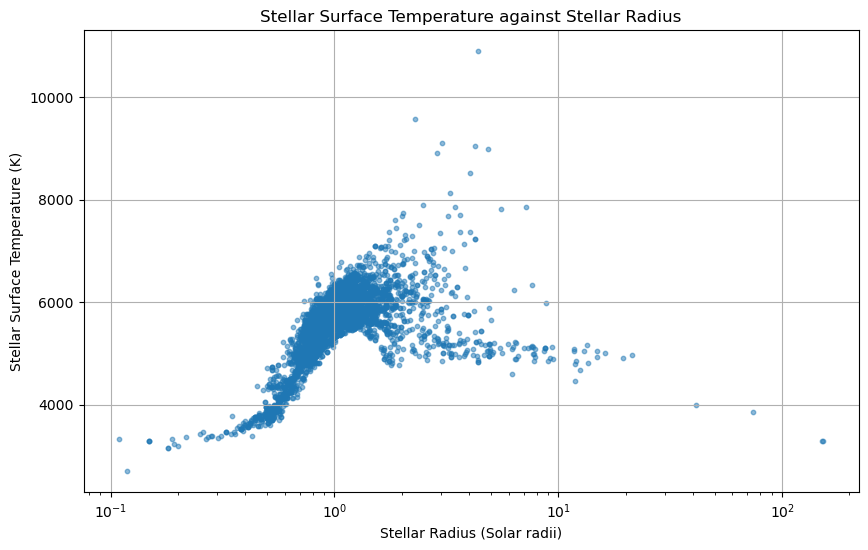

In [10]:
# Part c

plt.figure(figsize=(10, 6))
plt.scatter(df['koi_srad'], df['koi_steff'], s=10, alpha=0.5)
plt.title('Stellar Surface Temperature against Stellar Radius')
plt.ylabel('Stellar Surface Temperature (K)')
plt.xlabel('Stellar Radius (Solar radii)')
plt.xscale('log')
plt.grid(True)
plt.show()

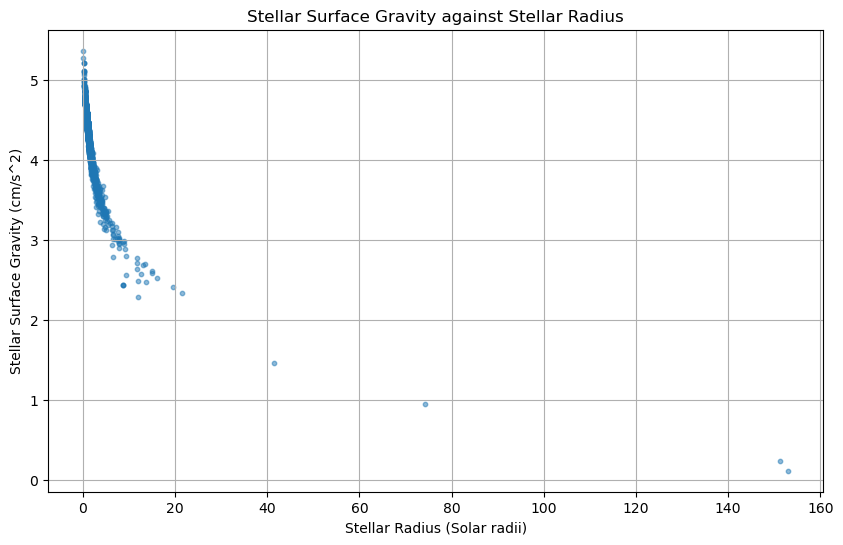

In [11]:
# Part d 

plt.figure(figsize=(10, 6))
plt.scatter(df['koi_srad'], df['koi_slogg'], s=10, alpha=0.5)
plt.title('Stellar Surface Gravity against Stellar Radius')
plt.ylabel('Stellar Surface Gravity (cm/s^2)')
plt.xlabel('Stellar Radius (Solar radii)')
# plt.xscale('log')
plt.grid(True)
plt.show()

In [12]:
# Part e

df_E = df.loc[:,["kepoi_name", "koi_smass", "koi_period"]]

# get KOI mass 
mass = pd.read_csv("koi_planet_masses_updated.csv")

# Pad kepoi name with "K" and 0 until it matches "kepoi_name" in df_E
# The ability of organisers to cause confusion is staggering (im sorry if youre reading this, and even more sorry for unreadable spaghetti code)
mass["kepoi_name"] = mass["kepoi_name"].apply(lambda x: f"K{str(x):0>8}" if not pd.isnull(x) else x)

# convert to earth masses
mass["koi_mass"] = 10**mass["koi_mass(log10 earth masses)"] 

# merge 
df_E = df_E.merge(mass, how='left', left_on='kepoi_name', right_on='kepoi_name')
df_E.dropna(subset=['koi_mass'], inplace=True)
df_E

# now that we finally have the planet masses, lets start calculating semi-major axis

,kepoi_name,koi_smass,koi_period,koi_mass(log10 earth masses),koi_mass
0,K00752.01,0.919,9.488036,0.83,6.760830
1,K00752.02,0.919,54.418383,0.94,8.709636
2,K00753.01,0.961,19.899140,2.11,128.824955
3,K00755.01,1.095,2.525592,1.00,10.000000
4,K00756.01,1.053,11.094321,1.29,19.498446
...,...,...,...,...,...
4287,K03207.01,1.836,0.954388,0.90,7.943282
4288,K03420.01,1.088,5.774511,0.68,4.786301
4289,K00351.07,1.089,124.922516,0.95,8.912509
4290,K01920.02,0.865,10.138469,-0.22,0.602560


In [13]:
def calculate_semi_major_axis(period, star_mass, planet_mass):
    return np.cbrt((period**2 * G * (star_mass + planet_mass)) / (4 * np.pi**2))

df_E["Semi-Major Axis (AU)"] = calculate_semi_major_axis(df_E["koi_period"]*24*60*60, df_E["koi_smass"]*SOLAR_MASS, df_E["koi_mass"]*EARTH_MASS) / AU
df_E_export = df_E[["kepoi_name", "Semi-Major Axis (AU)"]]
df_E_export.rename(columns={"kepoi_name": "KOI"}, inplace=True)

C:\Users\diwen\AppData\Local\Temp\ipykernel_11192\2066744721.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_E_export.rename(columns={"kepoi_name": "KOI"}, inplace=True)


In [14]:
df_E_export.to_csv('part_E.csv', index=False)

In [15]:
# Part f

# Merge df_E and df_B on kepoi_name
df_B.rename(columns={"KOI": "kepoi_name"},inplace=True)
merged_df = df_E.merge(df_B, on="kepoi_name", how="inner")

# Convert inner and outer radii from solar radii to AU
inner_radius_au = merged_df["Inner Radius of Habitable Zone (Solar Radius)"] * 0.00465047  # 1 AU = 215.032 Solar radii
outer_radius_au = merged_df["Outer Radius of Habitable Zone (Solar Radius)"] * 0.00465047

# List of kepoi_name where the semi-major axis is within the habitable zone
habitable_zone_kepoi_names = merged_df[(merged_df["Semi-Major Axis (AU)"] >= inner_radius_au) & (merged_df["Semi-Major Axis (AU)"] <= outer_radius_au)]["kepoi_name"]

# Print the list of kepoi_name
habitable_zone_kepoi_names.rename("KOI")
habitable_zone_kepoi_names

414     K00013.01
2096    K03132.01
3018    K04546.01
3338    K02093.02
3442    K02879.01
3513    K05287.01
4079    K03207.01
Name: kepoi_name, dtype: object

In [16]:
habitable_zone_kepoi_names.to_csv('part_F.csv', index=False)

In [17]:
# Part g (chatgpt carried from here onwards)

# Convert habitable_zone_kepoi_names to a DataFrame with a column name 'kepoi_name'
habitable_zone_df = pd.DataFrame({'kepoi_name': habitable_zone_kepoi_names})

# Merge habitable_zone_df with merged_df
merged_df_with_habitable_zone = merged_df.merge(habitable_zone_df, on='kepoi_name', how='left')
merged_df_with_habitable_zone

,kepoi_name,koi_smass,koi_period,koi_mass(log10 earth masses),koi_mass,Semi-Major Axis (AU),Stellar Mass,Luminosity,Inner Radius of Habitable Zone (Solar Radius),Outer Radius of Habitable Zone (Solar Radius)
0,K00752.01,0.919,9.488036,0.83,6.760830,0.085283,0.919,0.682698,0.787803,1.134949
1,K00752.02,0.919,54.418383,0.94,8.709636,0.273259,0.919,0.682698,0.787803,1.134949
2,K00753.01,0.961,19.899140,2.11,128.824955,0.141848,0.961,0.793311,0.849230,1.223443
3,K00755.01,1.095,2.525592,1.00,10.000000,0.037413,1.095,1.298705,1.086573,1.565371
4,K00756.01,1.053,11.094321,1.29,19.498446,0.099049,1.053,1.132648,1.014731,1.461873
...,...,...,...,...,...,...,...,...,...,...
4079,K03207.01,1.836,0.954388,0.90,7.943282,0.023231,1.836,17.249422,3.959961,5.704917
4080,K03420.01,1.088,5.774511,0.68,4.786301,0.064792,1.088,2.293073,1.443819,2.080037
4081,K00351.07,1.089,124.922516,0.95,8.912509,0.503200,1.089,1.641155,1.221458,1.759693
4082,K01920.02,0.865,10.138469,-0.22,0.602560,0.087355,0.865,0.492082,0.668840,0.963565


In [18]:
# Filter merged_df to keep only rows with kepoi_name in habitable_zone_kepoi_names
merged_df = merged_df[merged_df['kepoi_name'].isin(habitable_zone_kepoi_names)]
# Merge df with merged_df based on kepoi_name
merged_df = merged_df.merge(df[['kepoi_name', 'koi_prad']], on='kepoi_name', how='left')

merged_df = merged_df[["kepoi_name", "koi_mass", "koi_prad"]]
merged_df.rename(columns={"kepoi_name": "KOI", "koi_mass": "Mass (Earth Units)", "koi_prad": "Radius (Earth Units)"}, inplace=True)
categorisation = ["Jovians", "Earth", "Sub-star", "Jovians", "Earth", "Sub-star", "Super Earth"]
new_df = pd.DataFrame(categorisation, columns=['Category'])
merged_df = pd.concat([merged_df, new_df], axis=1)

merged_df

,KOI,Mass (Earth Units),Radius (Earth Units),Category
0,K00013.01,2238.721139,21.42,Jovians
1,K03132.01,1.122018,1.35,Earth
2,K04546.01,194984.459976,72.36,Sub-star
3,K02093.02,1698.243652,12.28,Jovians
4,K02879.01,0.660693,2.09,Earth
5,K05287.01,46773.514129,28.10,Sub-star
6,K03207.01,7.943282,2.27,Super Earth


In [19]:
merged_df.to_csv('part_G.csv', index=False)

In [20]:
# Column names for easy reference 
# COLUMN kepid:          KepID		
# COLUMN kepoi_name:     KOI Name		
# COLUMN kepler_name:    Kepler Name		
# COLUMN koi_disposition: Exoplanet Archive Disposition		
# COLUMN koi_vet_stat:   Vetting Status		
# COLUMN koi_vet_date:   Date of Last Parameter Update		
# COLUMN koi_pdisposition: Disposition Using Kepler Data		
# COLUMN koi_score:      Disposition Score		
# COLUMN koi_fpflag_nt:  Not Transit-Like False Positive Flag		
# COLUMN koi_fpflag_ss:  Stellar Eclipse False Positive Flag		
# COLUMN koi_fpflag_co:  Centroid Offset False Positive Flag		
# COLUMN koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag		
# COLUMN koi_disp_prov:  Disposition Provenance		
# COLUMN koi_comment:    Comment		
# COLUMN koi_period:     Orbital Period [days]		
# COLUMN koi_period_err1: Orbital Period Upper Unc. [days]		
# COLUMN koi_period_err2: Orbital Period Lower Unc. [days]		
# COLUMN koi_time0bk:    Transit Epoch [BKJD]		
# COLUMN koi_time0bk_err1: Transit Epoch Upper Unc. [BKJD]		
# COLUMN koi_time0bk_err2: Transit Epoch Lower Unc. [BKJD]		
# COLUMN koi_time0:      Transit Epoch [BJD]		
# COLUMN koi_time0_err1: Transit Epoch Upper Unc. [BJD]		
# COLUMN koi_time0_err2: Transit Epoch Lower Unc. [BJD]		
# COLUMN koi_eccen:      Eccentricity		
# COLUMN koi_eccen_err1: Eccentricity Upper Unc.		
# COLUMN koi_eccen_err2: Eccentricity Lower Unc.		
# COLUMN koi_longp:      Long. of Periastron [deg]		
# COLUMN koi_longp_err1: Long. of Periastron Upper Unc. [deg]		
# COLUMN koi_longp_err2: Long. of Periastron Lower Unc. [deg]		
# COLUMN koi_impact:     Impact Parameter		
# COLUMN koi_impact_err1: Impact Parameter Upper Unc.		
# COLUMN koi_impact_err2: Impact Parameter Lower Unc.		
# COLUMN koi_duration:   Transit Duration [hrs]		
# COLUMN koi_duration_err1: Transit Duration Upper Unc. [hrs]		
# COLUMN koi_duration_err2: Transit Duration Lower Unc. [hrs]		
# COLUMN koi_ingress:    Ingress Duration [hrs]		
# COLUMN koi_ingress_err1: Ingress Duration Upper Unc. [hrs]		
# COLUMN koi_ingress_err2: Ingress Duration Lower Unc. [hrs]		
# COLUMN koi_depth:      Transit Depth [ppm]		
# COLUMN koi_depth_err1: Transit Depth Upper Unc. [ppm]		
# COLUMN koi_depth_err2: Transit Depth Lower Unc. [ppm]		
# COLUMN koi_ror:        Planet-Star Radius Ratio		
# COLUMN koi_ror_err1:   Planet-Star Radius Ratio Upper Unc.		
# COLUMN koi_ror_err2:   Planet-Star Radius Ratio Lower Unc.		
# COLUMN koi_srho:       Fitted Stellar Density [g/cm**3]		
# COLUMN koi_srho_err1:  Fitted Stellar Density Upper Unc. [g/cm**3]		
# COLUMN koi_srho_err2:  Fitted Stellar Density Lower Unc. [g/cm**3]		
# COLUMN koi_fittype:    Planetary Fit Type		
# COLUMN koi_prad:       Planetary Radius [Earth radii]		
# COLUMN koi_prad_err1:  Planetary Radius Upper Unc. [Earth radii]		
# COLUMN koi_prad_err2:  Planetary Radius Lower Unc. [Earth radii]		
# COLUMN koi_sma:        Orbit Semi-Major Axis [au]		
# COLUMN koi_sma_err1:   Orbit Semi-Major Axis Upper Unc. [au]		
# COLUMN koi_sma_err2:   Orbit Semi-Major Axis Lower Unc. [au]		
# COLUMN koi_incl:       Inclination [deg]		
# COLUMN koi_incl_err1:  Inclination Upper Unc. [deg]		
# COLUMN koi_incl_err2:  Inclination Lower Unc. [deg]		
# COLUMN koi_teq:        Equilibrium Temperature [K]		
# COLUMN koi_teq_err1:   Equilibrium Temperature Upper Unc. [K]		
# COLUMN koi_teq_err2:   Equilibrium Temperature Lower Unc. [K]		
# COLUMN koi_insol:      Insolation Flux [Earth flux]		
# COLUMN koi_insol_err1: Insolation Flux Upper Unc. [Earth flux]		
# COLUMN koi_insol_err2: Insolation Flux Lower Unc. [Earth flux]		
# COLUMN koi_dor:        Planet-Star Distance over Star Radius		
# COLUMN koi_dor_err1:   Planet-Star Distance over Star Radius Upper Unc.		
# COLUMN koi_dor_err2:   Planet-Star Distance over Star Radius Lower Unc.		
# COLUMN koi_limbdark_mod: Limb Darkening Model		
# COLUMN koi_ldm_coeff4: Limb Darkening Coeff. 4		
# COLUMN koi_ldm_coeff3: Limb Darkening Coeff. 3		
# COLUMN koi_ldm_coeff2: Limb Darkening Coeff. 2		
# COLUMN koi_ldm_coeff1: Limb Darkening Coeff. 1		
# COLUMN koi_parm_prov:  Parameters Provenance		
# COLUMN koi_max_sngle_ev: Maximum Single Event Statistic		
# COLUMN koi_max_mult_ev: Maximum Multiple Event Statistic		
# COLUMN koi_model_snr:  Transit Signal-to-Noise		
# COLUMN koi_count:      Number of Planets		
# COLUMN koi_num_transits: Number of Transits		
# COLUMN koi_tce_plnt_num: TCE Planet Number		
# COLUMN koi_tce_delivname: TCE Delivery		
# COLUMN koi_quarters:   Quarters		
# COLUMN koi_bin_oedp_sig: Odd-Even Depth Comparision Statistic		
# COLUMN koi_trans_mod:  Transit Model		
# COLUMN koi_model_dof:  Degrees of Freedom		
# COLUMN koi_model_chisq: Chi-Square		
# COLUMN koi_datalink_dvr: Link to DV Report		
# COLUMN koi_datalink_dvs: Link to DV Summary		
# COLUMN koi_steff:      Stellar Effective Temperature [K]		
# COLUMN koi_steff_err1: Stellar Effective Temperature Upper Unc. [K]		
# COLUMN koi_steff_err2: Stellar Effective Temperature Lower Unc. [K]		
# COLUMN koi_slogg:      Stellar Surface Gravity [log10(cm/s**2)]		
# COLUMN koi_slogg_err1: Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]		
# COLUMN koi_slogg_err2: Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]		
# COLUMN koi_smet:       Stellar Metallicity [dex]		
# COLUMN koi_smet_err1:  Stellar Metallicity Upper Unc. [dex]		
# COLUMN koi_smet_err2:  Stellar Metallicity Lower Unc. [dex]		
# COLUMN koi_srad:       Stellar Radius [Solar radii]		
# COLUMN koi_srad_err1:  Stellar Radius Upper Unc. [Solar radii]		
# COLUMN koi_srad_err2:  Stellar Radius Lower Unc. [Solar radii]		
# COLUMN koi_smass:      Stellar Mass [Solar mass]		
# COLUMN koi_smass_err1: Stellar Mass Upper Unc. [Solar mass]		
# COLUMN koi_smass_err2: Stellar Mass Lower Unc. [Solar mass]		
# COLUMN koi_sage:       Stellar Age [Gyr]		
# COLUMN koi_sage_err1:  Stellar Age Upper Unc. [Gyr]		
# COLUMN koi_sage_err2:  Stellar Age Lower Unc. [Gyr]		
# COLUMN koi_sparprov:   Stellar Parameter Provenance		
# COLUMN ra:             RA [decimal degrees]		
# COLUMN dec:            Dec [decimal degrees]		
# COLUMN koi_kepmag:     Kepler-band [mag]		
# COLUMN koi_gmag:       g'-band [mag]		
# COLUMN koi_rmag:       r'-band [mag]		
# COLUMN koi_imag:       i'-band [mag]		
# COLUMN koi_zmag:       z'-band [mag]		
# COLUMN koi_jmag:       J-band [mag]		
# COLUMN koi_hmag:       H-band [mag]		
# COLUMN koi_kmag:       K-band [mag]		
# COLUMN koi_fwm_stat_sig: FW Offset Significance [percent]		
# COLUMN koi_fwm_sra:    FW Source &alpha;(OOT) [hrs]		
# COLUMN koi_fwm_sra_err: FW Source &alpha;(OOT) Unc. [hrs]		
# COLUMN koi_fwm_sdec:   FW Source &delta;(OOT) [deg]		
# COLUMN koi_fwm_sdec_err: FW Source &delta;(OOT) Unc. [deg]		
# COLUMN koi_fwm_srao:   FW Source &Delta;&alpha;(OOT) [sec]		
# COLUMN koi_fwm_srao_err: FW Source &Delta;&alpha;(OOT) Unc. [sec]		
# COLUMN koi_fwm_sdeco:  FW Source &Delta;&delta;(OOT) [arcsec]		
# COLUMN koi_fwm_sdeco_err: FW Source &Delta;&delta;(OOT) Unc. [arcsec]		
# COLUMN koi_fwm_prao:   FW &Delta;&alpha;(OOT) [sec]		
# COLUMN koi_fwm_prao_err: FW &Delta;&alpha;(OOT) Unc. [sec]		
# COLUMN koi_fwm_pdeco:  FW &Delta;&delta;(OOT) [arcsec]		
# COLUMN koi_fwm_pdeco_err: FW &Delta;&delta;(OOT) Unc. [arcsec]		
# COLUMN koi_dicco_mra:  PRF &Delta;&alpha;<sub>SQ</sub>(OOT) [arcsec]		
# COLUMN koi_dicco_mra_err: PRF &Delta;&alpha;<sub>SQ</sub>(OOT) Unc. [arcsec]		
# COLUMN koi_dicco_mdec: PRF &Delta;&delta;<sub>SQ</sub>(OOT) [arcsec]		
# COLUMN koi_dicco_mdec_err: PRF &Delta;&delta;<sub>SQ</sub>(OOT) Unc. [arcsec]		
# COLUMN koi_dicco_msky: PRF &Delta;&theta;<sub>SQ</sub>(OOT) []arcsec		
# COLUMN koi_dicco_msky_err: PRF &Delta;&theta;<sub>SQ</sub>(OOT) Unc. [arcsec]		
# COLUMN koi_dikco_mra:  PRF &Delta;&alpha;<sub>SQ</sub>(KIC) [arcsec]		
# COLUMN koi_dikco_mra_err: PRF &Delta;&alpha;<sub>SQ</sub>(KIC) Unc. [arcsec]		
# COLUMN koi_dikco_mdec: PRF &Delta;&delta;<sub>SQ</sub>(KIC) [arcsec]		
# COLUMN koi_dikco_mdec_err: PRF &Delta;&delta;<sub>SQ</sub>(KIC) Unc. [arcsec]		
# COLUMN koi_dikco_msky: PRF &Delta;&theta;<sub>SQ</sub>(KIC) [arcsec]		
# COLUMN koi_dikco_msky_err: PRF &Delta;&theta;<sub>SQ</sub>(KIC) Unc. [arcsec]		